In [181]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1


In [182]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1"
os.listdir(dataset_path)


['student_depression_dataset.csv']

In [183]:
import pandas as pd

# Assuming the downloaded dataset is in the path from cell 2
file_path = "/root/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1/student_depression_dataset.csv"
# Updated file_path to match the downloaded dataset's location

df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [184]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [185]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
0.0,27893
2.0,3
4.0,2
1.0,2
3.0,1


In [186]:
df['Work Pressure'].value_counts()

,count
Work Pressure,
0.0,27898
5.0,2
2.0,1


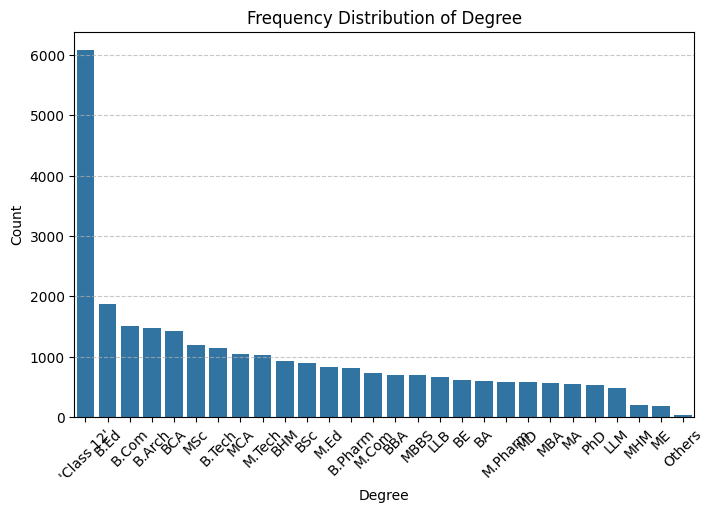

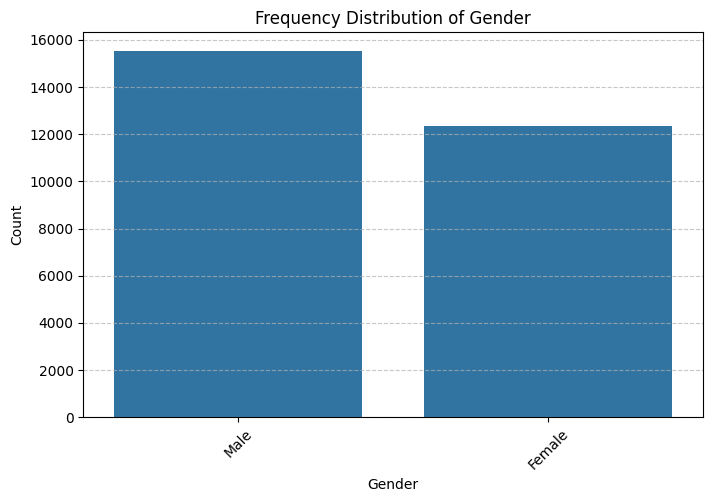

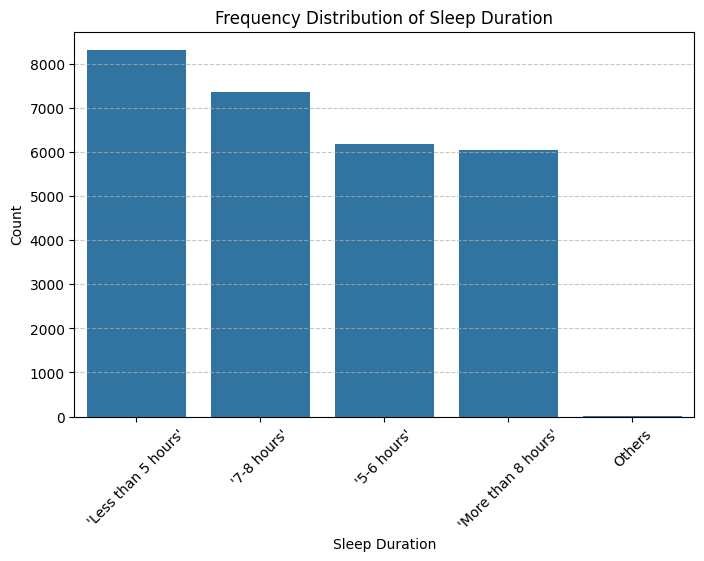

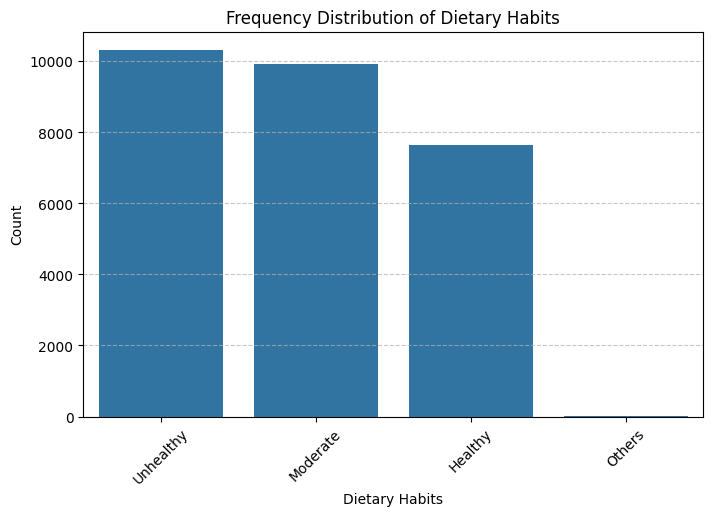

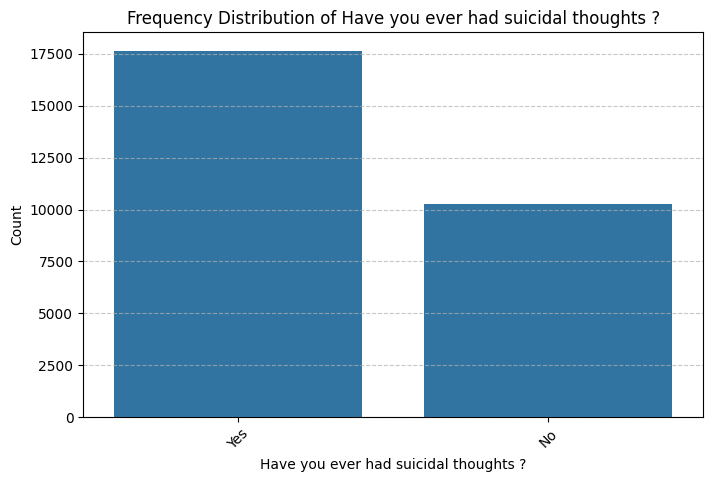

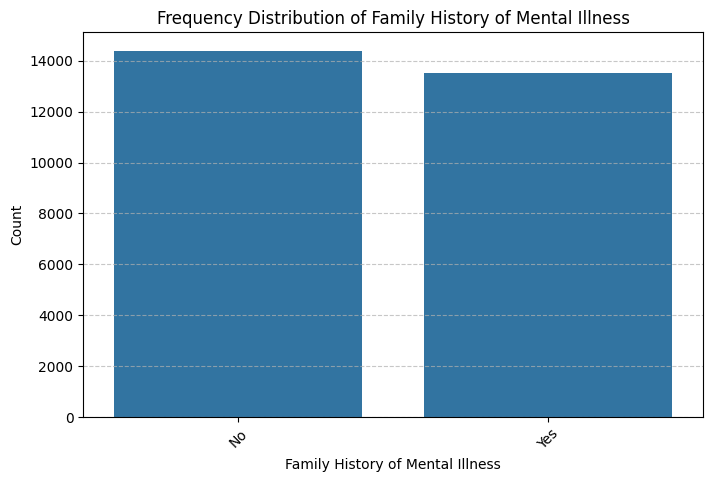

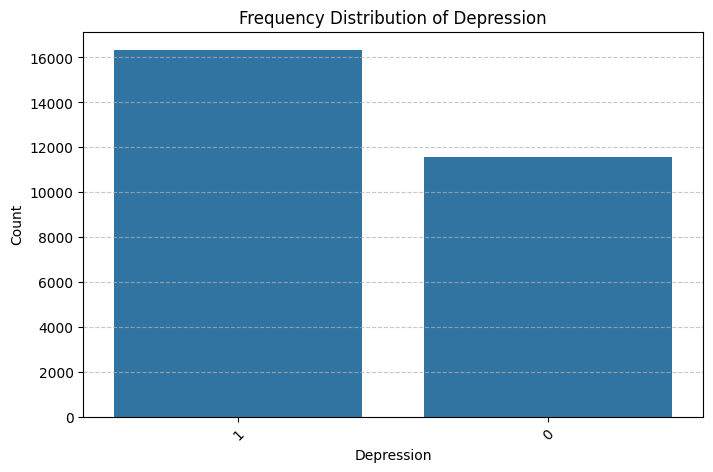

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Degree','Gender','Sleep Duration','Dietary Habits',
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

for col in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.title(f'Frequency Distribution of {col}')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [188]:
!pip install category_encoders

In [189]:
!pip install ace_tools # Installing the missing module

In [190]:

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder, BinaryEncoder

df_encoded = df.copy()  # Create a copy to avoid modifying the original

## 1️⃣ One-Hot Encoding (Low Cardinality Nominal Variables)
ohe_columns = ['Gender', 'Dietary Habits']
df_encoded = pd.get_dummies(df_encoded, columns=ohe_columns, drop_first=True)  # Drop first to avoid multicollinearity

## 2️⃣ Label Encoding (Ordinal Variables)
label_columns = ['Study Satisfaction', 'Sleep Duration', 'Academic Pressure']
le = LabelEncoder()
for col in label_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

## 3️⃣ Binary Encoding (Binary Variables)
binary_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
df_encoded[binary_columns] = df_encoded[binary_columns].replace({'Yes': 1, 'No': 0})

## 4️⃣ Target Encoding (High Cardinality Degree Column)
target_encoder = TargetEncoder()
df_encoded['Degree'] = target_encoder.fit_transform(df_encoded['Degree'], df_encoded['Depression'])  # Encoding Degree based on target

## 5️⃣ Frequency Encoding (For High Cardinality City and Profession)
df_encoded['City'] = df_encoded['City'].map(df_encoded['City'].value_counts(normalize=True))
df_encoded['Profession'] = df_encoded['Profession'].map(df_encoded['Profession'].value_counts(normalize=True))


<ipython-input-190-9e26e4dccf3e>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[binary_columns] = df_encoded[binary_columns].replace({'Yes': 1, 'No': 0})


In [191]:
df_encoded

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Male,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,2,33.0,0.034730,0.998889,5,0.0,8.97,2,0.0,0,0.528395,1,3.0,1.0,0,1,True,False,False,False
1,8,24.0,0.027490,0.998889,2,0.0,5.90,5,0.0,0,0.588964,0,3.0,2.0,1,0,False,True,False,False
2,26,31.0,0.049174,0.998889,3,0.0,7.03,5,0.0,2,0.535000,0,9.0,1.0,1,0,True,False,False,False
3,30,28.0,0.024551,0.998889,3,0.0,5.59,2,0.0,1,0.571528,1,4.0,5.0,1,1,False,True,False,False
4,32,25.0,0.037131,0.998889,4,0.0,8.13,3,0.0,0,0.509785,1,1.0,1.0,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,0.038637,0.998889,5,0.0,5.75,5,0.0,0,0.707730,1,7.0,1.0,1,0,False,False,False,True
27897,140686,27.0,0.039819,0.998889,2,0.0,9.40,3,0.0,2,0.570588,0,0.0,3.0,1,0,True,False,False,False
27898,140689,31.0,0.016523,0.998889,3,0.0,6.61,4,0.0,0,0.520979,0,12.0,2.0,0,0,True,False,False,True
27899,140690,18.0,0.039819,0.998889,5,0.0,6.88,2,0.0,2,0.707730,1,10.0,5.0,0,1,False,False,False,False


In [192]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  float64
 3   Profession                             27901 non-null  float64
 4   Academic Pressure                      27901 non-null  int64  
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  int64  
 10  Degree                                 27901 non-null  float64
 11  Ha

In [193]:

boolean_columns = ['Gender_Male','Dietary Habits_Moderate', 'Dietary Habits_Others', 'Dietary Habits_Unhealthy']

for col in boolean_columns:
    df_encoded[col] = df_encoded[col].astype(int)


In [194]:
df_encoded

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Male,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,2,33.0,0.034730,0.998889,5,0.0,8.97,2,0.0,0,0.528395,1,3.0,1.0,0,1,1,0,0,0
1,8,24.0,0.027490,0.998889,2,0.0,5.90,5,0.0,0,0.588964,0,3.0,2.0,1,0,0,1,0,0
2,26,31.0,0.049174,0.998889,3,0.0,7.03,5,0.0,2,0.535000,0,9.0,1.0,1,0,1,0,0,0
3,30,28.0,0.024551,0.998889,3,0.0,5.59,2,0.0,1,0.571528,1,4.0,5.0,1,1,0,1,0,0
4,32,25.0,0.037131,0.998889,4,0.0,8.13,3,0.0,0,0.509785,1,1.0,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,0.038637,0.998889,5,0.0,5.75,5,0.0,0,0.707730,1,7.0,1.0,1,0,0,0,0,1
27897,140686,27.0,0.039819,0.998889,2,0.0,9.40,3,0.0,2,0.570588,0,0.0,3.0,1,0,1,0,0,0
27898,140689,31.0,0.016523,0.998889,3,0.0,6.61,4,0.0,0,0.520979,0,12.0,2.0,0,0,1,0,0,1
27899,140690,18.0,0.039819,0.998889,5,0.0,6.88,2,0.0,2,0.707730,1,10.0,5.0,0,1,0,0,0,0


In [195]:
df_encoded=df_encoded.drop(columns=['Work Pressure','Job Satisfaction','id'],axis=1)

In [196]:
df_encoded['Financial Stress'] = pd.to_numeric(df_encoded['Financial Stress'], errors='coerce').astype('Int64')

In [197]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    27901 non-null  float64
 1   City                                   27901 non-null  float64
 2   Profession                             27901 non-null  float64
 3   Academic Pressure                      27901 non-null  int64  
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  int64  
 6   Sleep Duration                         27901 non-null  int64  
 7   Degree                                 27901 non-null  float64
 8   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 9   Work/Study Hours                       27901 non-null  float64
 10  Financial Stress                       27898 non-null  Int64  
 11  Fa

In [198]:
df_encoded.head()

,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Male,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,33.0,0.034730,0.998889,5,8.97,2,0,0.528395,1,3.0,1,0,1,1,0,0,0
1,24.0,0.027490,0.998889,2,5.90,5,0,0.588964,0,3.0,2,1,0,0,1,0,0
2,31.0,0.049174,0.998889,3,7.03,5,2,0.535000,0,9.0,1,1,0,1,0,0,0
3,28.0,0.024551,0.998889,3,5.59,2,1,0.571528,1,4.0,5,1,1,0,1,0,0
4,25.0,0.037131,0.998889,4,8.13,3,0,0.509785,1,1.0,1,0,0,0,1,0,0


In [199]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
continuous_cols = ['Age', 'CGPA', 'Work/Study Hours']
df_encoded[continuous_cols] = scaler.fit_transform(df_encoded[continuous_cols])

In [200]:
df_encoded

,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Male,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,1.463165,0.034730,0.998889,5,0.893393,2,0,0.528395,1,-1.121213,1,0,1,1,0,0,0
1,-0.371474,0.027490,0.998889,2,-1.194076,5,0,0.588964,0,-1.121213,2,1,0,0,1,0,0
2,1.055467,0.049174,0.998889,3,-0.425724,5,2,0.535000,0,0.497095,1,1,0,1,0,0,0
3,0.443921,0.024551,0.998889,3,-1.404862,2,1,0.571528,1,-0.851495,5,1,1,0,1,0,0
4,-0.167625,0.037131,0.998889,4,0.322229,3,0,0.509785,1,-1.660650,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.240073,0.038637,0.998889,5,-1.296069,5,0,0.707730,1,-0.042341,1,1,0,0,0,0,1
27897,0.240073,0.039819,0.998889,2,1.185774,3,2,0.570588,0,-1.930368,3,1,0,1,0,0,0
27898,1.055467,0.016523,0.998889,3,-0.711306,4,0,0.520979,0,1.306249,2,0,0,1,0,0,1
27899,-1.594566,0.039819,0.998889,5,-0.527718,2,2,0.707730,1,0.766813,5,0,1,0,0,0,0


In [202]:
df_encoded.isna().sum()

,0
Age,0
City,0
Profession,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Degree,0
Have you ever had suicidal thoughts ?,0
Work/Study Hours,0


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Define features and target variable
X = df_encoded.drop(columns=['Depression'])  # Features
y = df_encoded['Depression']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using the trained imputer

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.83730514244759
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [204]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8301379681060742
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.85      0.86      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



In [205]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8355133488622111
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.83      5581



In [206]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:54:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8249417667084752
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.82      0.82      5581



In [207]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.806307113420534
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2343
           1       0.81      0.86      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.80      0.80      0.80      5581
weighted avg       0.81      0.81      0.80      5581

